In [91]:
import pandas as pd

# Declaration
data = pd.read_csv("Kumande Asset - Food.csv")

# Sorting
asset = [
    {"column":"calorie","unit":"Cal"},
    {"column":"Fat","unit":"g"},
    {"column":"sugar","unit":"g"},
    {"column":"Protein","unit":"g"},
    {"column":"Cholesterol","unit":"mg"},
    {"column":"sodium","unit":"g"},
    {"column":"Calcium","unit":"mg"},
    {"column":"Nutrition Density","unit":"per 100 Cal / Serving"},
    {"column":"Potassium","unit":"mg"}
]

for item in asset:
    column, unit = item["column"], item["unit"]
    print(f"Summary of {column}\n============================================================")
    
    # Highest Value
    highest = data.loc[data[column].idxmax(), ["food", column]]
    print(f"Highest {column.capitalize()}: {highest['food'].title()} ({highest[column]} {unit})")
    
    # Lowest Value
    lowest = data.loc[data[column].idxmin(), ["food", column]]
    print(f"Lowest {column.capitalize()}: {lowest['food'].title()} ({lowest[column]} {unit})")

    # Average Value
    average = data[column].mean()
    print(f"Average {column.capitalize()}: {average:.2f} {unit}")
    print("\n")


Summary of calorie
Highest Calorie: Goose Meat Raw (6077 Cal)
Lowest Calorie: Baking Soda (0 Cal)
Average Calorie: 223.77 Cal


Summary of Fat
Highest Fat: Goose Meat Raw (550.7 g)
Lowest Fat: Mozzarella Cheese Fat Free (0.0 g)
Average Fat: 10.18 g


Summary of sugar
Highest Sugar: Vanilla Frosting (291.5 g)
Lowest Sugar: Swiss Cheese (0.0 g)
Average Sugar: 4.46 g


Summary of Protein
Highest Protein: Pork Arm Picnic Cooked (560.3 g)
Lowest Protein: Fruit Jam (0.0 g)
Average Protein: 13.40 g


Summary of Cholesterol
Highest Cholesterol: Veal Brain Cooked (10509.0 mg)
Lowest Cholesterol: Requeijao Cremoso Light Catupiry (0.0 mg)
Average Cholesterol: 62.17 mg


Summary of sodium
Highest Sodium: Adobo Fresco (49.4 g)
Lowest Sodium: Requeijao Cremoso Light Catupiry (0.0 g)
Average Sodium: 0.29 g


Summary of Calcium
Highest Calcium: Mexican Cheese (1283.5 mg)
Lowest Calcium: Requeijao Cremoso Light Catupiry (0.0 mg)
Average Calcium: 52.05 mg


Summary of Nutrition Density
Highest Nutrition

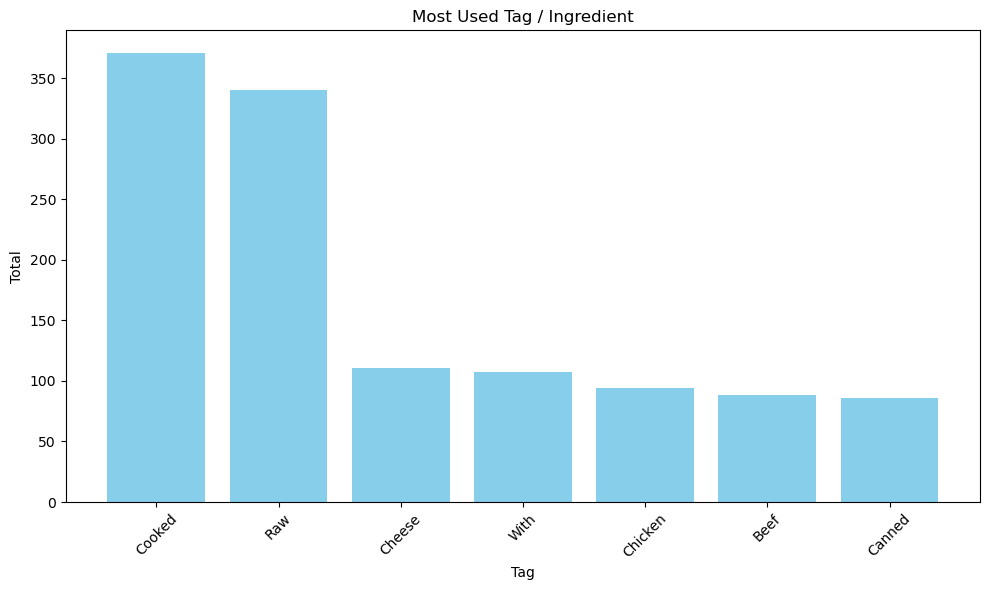

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Declaration
data = pd.read_csv("Kumande Asset - Food.csv")

# Separate by space, assume the ingredient or tags
ingredient = data['food'].str.split(expand=True)
ingredient_exploded = data['food'].str.split().explode()

# Reset index and count
tag_counts = ingredient_exploded.value_counts().reset_index()

# Rename col
tag_counts.columns = ['Tag', 'Total']

# Sort the result by count in descending order
tag_counts = tag_counts.sort_values(by='Total', ascending=False).reset_index(drop=True).head(7)

# Dataset
context = tag_counts['Tag'].str.title().tolist()
total = tag_counts['Total'].tolist()

# Bar Chart
plt.figure(figsize=(10,6))
plt.bar(context,total,color="skyblue")

plt.title("Most Used Tag / Ingredient")
plt.xlabel("Tag")
plt.ylabel("Total")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()